In [2]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
matplotlib.rcParams['font.size'] = 7

import matplotlib.lines as mlines
import seaborn
seaborn.set_style('darkgrid')
import logging
import importlib
importlib.reload(logging) # see https://stackoverflow.com/a/21475297/1469195
log = logging.getLogger()
log.setLevel('DEBUG')
import sys
logging.basicConfig(format='%(asctime)s %(levelname)s : %(message)s',
                     level=logging.DEBUG, stream=sys.stdout)
seaborn.set_palette('colorblind')
import os
# add the repo itself
os.sys.path.insert(0, '/home/schirrmr/code/explaining/reversible//')
os.sys.path.insert(0, '/home/schirrmr/braindecode/code/braindecode/')

In [3]:
from braindecode.datasets.bbci import BBCIDataset

In [6]:
cnt = BBCIDataset('/data/schirrmr/schirrmr/HGD-public/reduced/train/8.mat', load_sensor_names=['C3', 'C4', 'Cz']).load()

In trialwise decoding, you forward trials through your network and get one prediction per trial. Then you train the network using the loss between the predictions and the labels for the trials.



(0.8352941176470589, 0.3686274509803922, 0.0, 0.2)

Text(67,-87.5,'Loss')

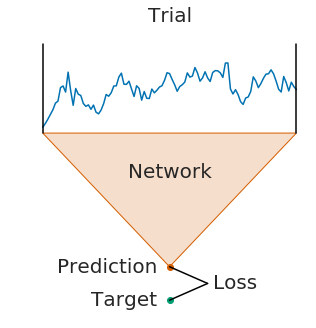

In [81]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201]
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [50, -80], [100, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
plt.ylim(-100,22)
plt.text(50,30, "Trial", fontsize=20, ha='center')
plt.text(50,-40, "Network", fontsize=20, ha='center')
plt.plot(50,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.text(45,-80, "Prediction", fontsize=20, ha='right', va='center')
plt.plot(50,-95, ls='', marker='o')
plt.text(45,-95, "Target", fontsize=20, ha='right', va='center')
plt.axis('off')

plt.plot([50,65],[-80, -87.5], color='black')
plt.plot([50,65],[-95, -87.5], color='black')
plt.text(67,-87.5, "Loss", fontsize=20, ha='left', va='center')

(-5.0, 105.0, -100.0, 22.0)

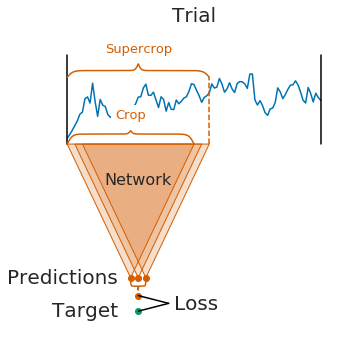

In [219]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201]
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [25, -80], [50, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
points = [[3, -20], [28, -80], [53, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
points = [[6, -20], [31, -80], [56, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
plt.plot(25,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.plot(28,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.plot(31,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.ylim(-100,22)
plt.text(50,35, "Trial", fontsize=20, ha='center')
plt.text(28,-38, "Network", fontsize=16, ha='center')
plt.text(20,-80, "Predictions", fontsize=20, ha='right', va='center')
plt.plot(28,-95, ls='', marker='o')
plt.text(20,-95, "Target", fontsize=20, ha='right', va='center')

# from https://stackoverflow.com/a/20308475/1469195
def range_brace(x_min, x_max, mid=0.75, 
                beta1=50.0, beta2=100.0, height=1, 
                initial_divisions=11, resolution_factor=1.5):
    NP = np
    # determine x0 adaptively values using second derivitive
    # could be replaced with less snazzy:
    #   x0 = NP.arange(0, 0.5, .001)
    x0 = NP.array(())
    tmpx = NP.linspace(0, 0.5, initial_divisions)
    tmp = beta1**2 * (NP.exp(beta1*tmpx)) * (1-NP.exp(beta1*tmpx)) / NP.power((1+NP.exp(beta1*tmpx)),3)
    tmp += beta2**2 * (NP.exp(beta2*(tmpx-0.5))) * (1-NP.exp(beta2*(tmpx-0.5))) / NP.power((1+NP.exp(beta2*(tmpx-0.5))),3)
    for i in range(0, len(tmpx)-1):
        t = int(NP.ceil(resolution_factor*max(NP.abs(tmp[i:i+2]))/float(initial_divisions)))
        x0 = NP.append(x0, NP.linspace(tmpx[i],tmpx[i+1],t))
    x0 = NP.sort(NP.unique(x0)) # sort and remove dups
    # half brace using sum of two logistic functions
    y0 = mid*2*((1/(1.+NP.exp(-1*beta1*x0)))-0.5)
    y0 += (1-mid)*2*(1/(1.+NP.exp(-1*beta2*(x0-0.5))))
    # concat and scale x
    x = NP.concatenate((x0, 1-x0[::-1])) * float((x_max-x_min)) + x_min
    y = NP.concatenate((y0, y0[::-1])) * float(height)
    return (x,y)


x,y = range_brace(0, 50, height=6)
ax.plot(x, y-20,'-')

ax.annotate('Crop',  xy=(25, -10), xycoords='data', 
            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[2],
            bbox=dict(boxstyle='square', fc='white', ec='None',))

x,y = range_brace(0, 56, height=6, mid=0.5, beta1=50)
ax.plot(x, y+10,'-', color=seaborn.color_palette()[2])
plt.plot([56,56], [-20,10], ls='--', color=seaborn.color_palette()[2])
ax.annotate('Supercrop',  xy=(28, 20), xycoords='data', 
            fontsize=13, ha='center', va='bottom', color=seaborn.color_palette()[2],
            bbox=dict(boxstyle='square', fc='white', ec='None',))
x,y = range_brace(25, 31, height=3.5, mid=0.5, beta1=50)
ax.plot(x, -y-82,'-', color=seaborn.color_palette()[2])
plt.plot(28,-88, ls='', marker='o',  color=seaborn.color_palette()[2])

plt.plot([28,40],[-88, -91.5], color='black')
plt.plot([28,40],[-95, -91.5], color='black')
plt.text(42,-91.5, "Loss", fontsize=20, ha='left', va='center')
plt.axis('off')

In [ ]:

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
def curly(x,y, size, scale, rotation, ax=None):
    tp = TextPath((0, 0), "}", size=size,)
    #trans = mtrans.Affine2D().scale(1, scale) + mtrans.Affine2D().rotate_deg(rotation) + \
    #    mtrans.Affine2D().translate(x,y) + ax.transData
    trans = mtrans.Affine2D().rotate_deg(rotation) + mtrans.Affine2D().translate(x,y) + ax.transData
    pp = PathPatch(tp, lw=0, fc="k", transform=trans)
    ax.add_artist(pp)

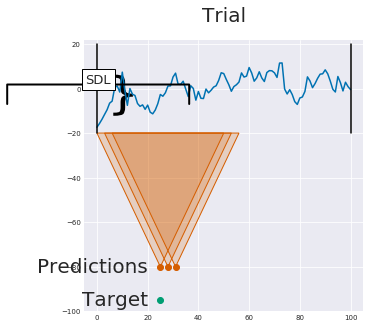

In [157]:
plt.figure(figsize=(5,5))
data = cnt.get_data()[0,100:201]
plt.plot(data - np.mean(data))
ax = plt.gca()
plt.plot([0,0],[-20,20], color='black')
plt.plot([100,100],[-20,20], color='black')
points = [[0, -20], [25, -80], [50, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
points = [[3, -20], [28, -80], [53, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
points = [[6, -20], [31, -80], [56, -20]]
polygon = plt.Polygon(points,  facecolor=seaborn.color_palette()[2] + (0.2,), edgecolor=seaborn.color_palette()[2])
ax.add_artist(polygon)
plt.plot(25,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.plot(28,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.plot(31,-80, ls='', marker='o', color=seaborn.color_palette()[2])
plt.ylim(-100,22)
plt.text(50,30, "Trial", fontsize=20, ha='center')
plt.text(20,-80, "Predictions", fontsize=20, ha='right', va='center')
plt.plot(25,-95, ls='', marker='o')
plt.text(20,-95, "Target", fontsize=20, ha='right', va='center')


# Here is the label and arrow code of interest

ax.annotate('SDL', xy=(0.5, 0.90), xytext=(0.5, 1.00), xycoords='data', 
            fontsize=13, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
"""
plt.annotate(r"$\}$",fontsize=46,
            xy=(0.27, 0.77), xycoords='figure fraction',
            rotation=90)"""

import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
def curly(x,y, size, scale, rotation, ax=None):
    tp = TextPath((0, 0), "}", size=size)
    #trans = mtrans.Affine2D().scale(1, scale) + mtrans.Affine2D().rotate_deg(rotation) + \
    #    mtrans.Affine2D().translate(x,y) + ax.transData
    trans = ax.transData + mtrans.Affine2D().translate(x,y) 
    pp = PathPatch(tp, lw=0, fc="k", transform=trans)
    ax.add_artist(pp)


curly(10,-20,20, 0.5, 90, ax)

In [ ]:
plt.text(45,-80, "Prediction", fontsize=20, ha='right', va='center')
plt.plot(50,-95, ls='', marker='o')
plt.text(45,-95, "Target", fontsize=20, ha='right', va='center')
plt.axis('off')

plt.plot([50,65],[-80, -87.5], color='black')
plt.plot([50,65],[-95, -87.5], color='black')
plt.text(67,-87.5, "Loss", fontsize=20, ha='left', va='center')

In [ ]:
plt.plot(cnt.get_data()[0,100:201])
plt.axvline(x=0, color='black')
plt.axvline(x=100, color='black')